<a href="https://colab.research.google.com/github/kallishkumarN/Machine-Learning/blob/master/Diabetes_diagonise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
diabetes=pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')


In [5]:
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [39]:
print("dimension of diabetes data:{}".format(diabetes.shape))

dimension of diabetes data:(768, 9)


In [9]:
print(diabetes.groupby('class').size())

class
tested_negative    500
tested_positive    268
dtype: int64


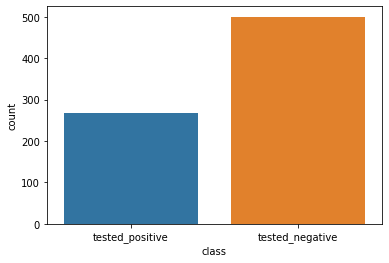

In [12]:
import seaborn as sns
sns.countplot(diabetes['class'],label="count")

In [13]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(diabetes.loc[:,diabetes.columns !='class'],diabetes['class'],stratify=diabetes['class'],random_state=66)

from sklearn.neighbors import KNeighborsClassifier

training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
  knn=KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train,y_train)
training_accuracy.append(knn.score(X_train,y_train))
test_accuracy.append(knn.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy, label="training accuracy")
plt.plot(neighbors_settings,test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare.png')